# Your info

Full name: Sara Kodeiri

Student ID: 96521443

# Q1. Perceptron

In [93]:
# Q1_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Q1_graded
# Do not change the above line.

data = [[0,0,1], [1,0,0], [0,1,0], [1,1,0]]
learning_rate = 0.1
epoch_count = 5
weights = 3 * [0]
for epoch in range(epoch_count):
  error_t = 0.0
  for row in data:
    activation = weights[2] * row[1] + weights[1] * row[0] + weights[0] + 1
    prediction = 1 if activation >= 1 else 0
    error = row[2] - prediction
    error_t += error**2
    weights[0] = weights[0] + learning_rate * error
    weights[1] = weights[1] + learning_rate * error * row[0]
    weights[2] = weights[2] + learning_rate * error * row[1]
  print("Epoch:", epoch, "Error:", error_t)

print(weights)


Epoch: 0 Error: 1.0
Epoch: 1 Error: 2.0
Epoch: 2 Error: 1.0
Epoch: 3 Error: 0.0
Epoch: 4 Error: 0.0
[0.0, -0.1, -0.1]


In [95]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

# Q2. Binary Classification

In [96]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [97]:
# Q2_graded

file = open("/content/data.txt","r+")
lines = file.readlines()
data = []

for line in lines:
  line = line[:len(line) - 1]
  list_ = line.split(",")
  for i in range(len(list_)):
    list_[i] = float(list_[i])
  data.append(list_)


In [98]:
# Q2_graded
# Do not change the above line.

learning_rate = 0.1
epoch_count = 7000
weights = 3 * [0]
x_errplot = []
y_errplot = []
y_accplot = []
for epoch in range(epoch_count):
  error_t = 0
  for row in data:
    activation = weights[2] * row[1] + weights[1] * row[0] + weights[0] + 1
    prediction = 1 if activation >= 1 else 0
    error = row[2] - prediction
    error_t += error**2
    weights[0] = weights[0] + learning_rate * error
    weights[1] = weights[1] + learning_rate * error * row[0]
    weights[2] = weights[2] + learning_rate * error * row[1]
  if epoch%100 == 0 or epoch == epoch_count - 1:
    x_errplot.append(epoch)
    y_errplot.append(error_t)
    y_accplot.append(100 - error_t)
    
    print("Epoch:", epoch, "Error:", error_t)

print(weights)

Epoch: 0 Error: 57.0
Epoch: 100 Error: 56.0
Epoch: 200 Error: 53.0
Epoch: 300 Error: 58.0
Epoch: 400 Error: 53.0
Epoch: 500 Error: 56.0
Epoch: 600 Error: 56.0
Epoch: 700 Error: 51.0
Epoch: 800 Error: 51.0
Epoch: 900 Error: 54.0
Epoch: 1000 Error: 52.0
Epoch: 1100 Error: 50.0
Epoch: 1200 Error: 51.0
Epoch: 1300 Error: 56.0
Epoch: 1400 Error: 49.0
Epoch: 1500 Error: 45.0
Epoch: 1600 Error: 48.0
Epoch: 1700 Error: 46.0
Epoch: 1800 Error: 48.0
Epoch: 1900 Error: 56.0
Epoch: 2000 Error: 50.0
Epoch: 2100 Error: 45.0
Epoch: 2200 Error: 49.0
Epoch: 2300 Error: 51.0
Epoch: 2400 Error: 43.0
Epoch: 2500 Error: 52.0
Epoch: 2600 Error: 45.0
Epoch: 2700 Error: 52.0
Epoch: 2800 Error: 48.0
Epoch: 2900 Error: 43.0
Epoch: 3000 Error: 42.0
Epoch: 3100 Error: 52.0
Epoch: 3200 Error: 50.0
Epoch: 3300 Error: 46.0
Epoch: 3400 Error: 41.0
Epoch: 3500 Error: 37.0
Epoch: 3600 Error: 37.0
Epoch: 3700 Error: 41.0
Epoch: 3800 Error: 41.0
Epoch: 3900 Error: 42.0
Epoch: 4000 Error: 47.0
Epoch: 4100 Error: 41.0
Epoc

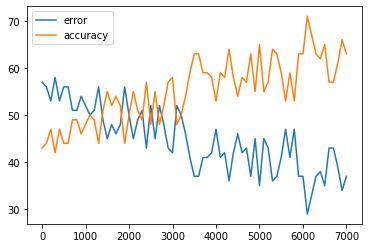

In [99]:
# Q2_graded
# Do not change the above line.

plt.plot(x_errplot, y_errplot)
plt.plot(x_errplot, y_accplot)
plt.legend(['error', 'accuracy'])


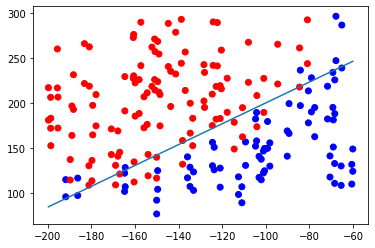

In [100]:
# Q2_graded
plt.scatter(x_coordinates, y_coordinates, color=label)
x = np.linspace(np.amin(x_coordinates), np.amax(x_coordinates))
y = (-weights[1] * x - 2*weights[0]) / weights[2]

plt.plot(x, y)


# Q4. MLP

In [101]:
# Q4_graded
# Do not change the above line.

# This cell is for your imports.

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import Model

In [102]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

visible = Input(shape=x_train[0].shape)
layer = Dense(units=400, activation='relu')(visible)
layer = Dense(units=200, activation='relu')(layer)
layer = Dense(units=50, activation='relu')(layer)
layer = Dense(units=num_classes, activation='softmax')(layer)
model = Model(inputs=visible, outputs=layer)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=250,
                    epochs=20,
                    validation_data=(x_test, y_test))

print(history.history.keys())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 404,760
Trainable params: 404,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
240/240 [==============================] - 4s 16ms/step - loss: 5.2539 - accuracy: 0.3249 - val_loss: 1.0704

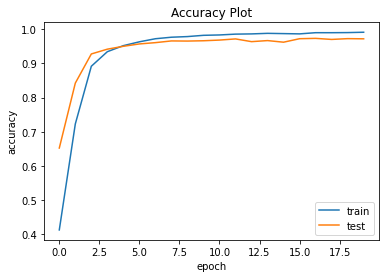

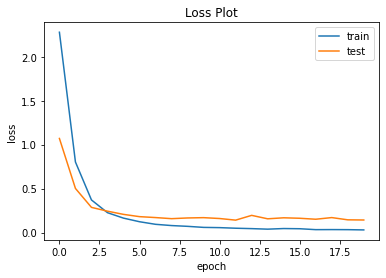

In [103]:
# Q4_graded
# Do not change the above line.


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# This cell is for your codes.

# Q5. Back-Propagation

In [104]:
# Q5_graded
# Do not change the above line.

# This cell is for your imports

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [105]:
# Q5_graded
# Do not change the above line.
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return (Z > 0).astype(int) 

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def train(X, Y, alpha, epochs):
    W1, b1, W2, b2 = init_params()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0 or i==epochs - 1:
            print("Epoch:", i, "    Accuracy on training data:", 
                  np.sum(np.argmax(A2, 0) == Y) / Y.size)
    return W1, b1, W2, b2


In [108]:
# Q5_graded
# Do not change the above line.

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape((x_train.shape[0], 784)) / 255
x_test = x_test.reshape((x_test.shape[0], 784)) / 255

m, n = x_train.shape
learning_rate = 0.1
epoch_count = 500

W1, b1, W2, b2 = train(x_train.T, y_train.T, learning_rate, epoch_count)

Epoch: 0     Accuracy on training data: 0.09913333333333334
Epoch: 10     Accuracy on training data: 0.18823333333333334
Epoch: 20     Accuracy on training data: 0.2866166666666667
Epoch: 30     Accuracy on training data: 0.3587
Epoch: 40     Accuracy on training data: 0.40765
Epoch: 50     Accuracy on training data: 0.4464166666666667
Epoch: 60     Accuracy on training data: 0.47986666666666666
Epoch: 70     Accuracy on training data: 0.5152
Epoch: 80     Accuracy on training data: 0.5454166666666667
Epoch: 90     Accuracy on training data: 0.5728166666666666
Epoch: 100     Accuracy on training data: 0.5959
Epoch: 110     Accuracy on training data: 0.6170333333333333
Epoch: 120     Accuracy on training data: 0.6344666666666666
Epoch: 130     Accuracy on training data: 0.6508166666666667
Epoch: 140     Accuracy on training data: 0.6645333333333333
Epoch: 150     Accuracy on training data: 0.6754166666666667
Epoch: 160     Accuracy on training data: 0.6855666666666667
Epoch: 170     Acc

In [109]:
# Q5_graded
# Do not change the above line.

_, _, _, result = forward(W1, b1, W2, b2, x_test.T)
predictions = np.argmax(result, 0)
final = np.sum(predictions == y_test) / y_test.size
print("Accuracy on training data:", final)


Accuracy on training data: 0.8475


# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.